In [1]:
import numpy as np;
import matplotlib.pyplot as plt
import scipy.fft
import seaborn as sns;

from data_utils import *

DATASET = '/Users/stepanmazokha/Desktop/wisig_manytx_rffi_dataset/'
FIG_DIR = '/Users/stepanmazokha/Desktop/figs/'

In [2]:
compact_dataset = load_compact_pkl_dataset(DATASET, 'ManyTx')

data = compact_dataset['data']
tx_list = compact_dataset['tx_list']
rx_list = compact_dataset['rx_list']
capture_date_list = compact_dataset['capture_date_list']

In [3]:
def generate_spectrum(data, tx_id, rx_id, date_id, equalized):
    # data shape: [tx(6), rx(12), date(4), equalized? (1-unprocessed, 2-equalized), # of signals(1000), # of samples(256), I/Q split(2)]
    N = 256

    samples = data[tx_id][rx_id][date_id][equalized]

    if len(samples) < 50:
        print("Not enough samples: " + str(len(samples)))
        return

    # Convert into frequency domain (spectrum)
    spectrum = np.zeros(shape=(N-1, 50), dtype='float32')
    for packet_id in np.arange(50):
        packet = np.array(samples[packet_id])
        signal = packet[:, 0] + 1j * packet[:, 1]

        yf = scipy.fft.fft(signal, n=256)
        # xf = scipy.fft.fftfreq(N, T)[:N//2]
        # plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
        # plt.show()

        # Generate channel independent spectrogram.
        yf_ind = yf[1:]/yf[:-1]
        # xf_ind = xf[1:]
        # plt.plot(xf_ind, 2.0/256 * np.abs(yf_ind[0:256//2-1]))
        # plt.show()

        spectrum[:, packet_id] = np.abs(yf_ind)

    spectrum_amp = np.log10(np.abs(spectrum)**2)

    # Plot the spectrogram using seaborn heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(spectrum_amp, cmap='viridis', cbar=True)
    plt.title("Spectrogram")
    plt.xlabel("Packet ID")
    plt.ylabel("Frequency Bin")
    plt.savefig(FIG_DIR + 'spectrogram-' + str(tx_id) + "-" + str(rx_id) + ".png")
    plt.close()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/stepanmazokha/Desktop/figs/spectrogram-1-1.png'

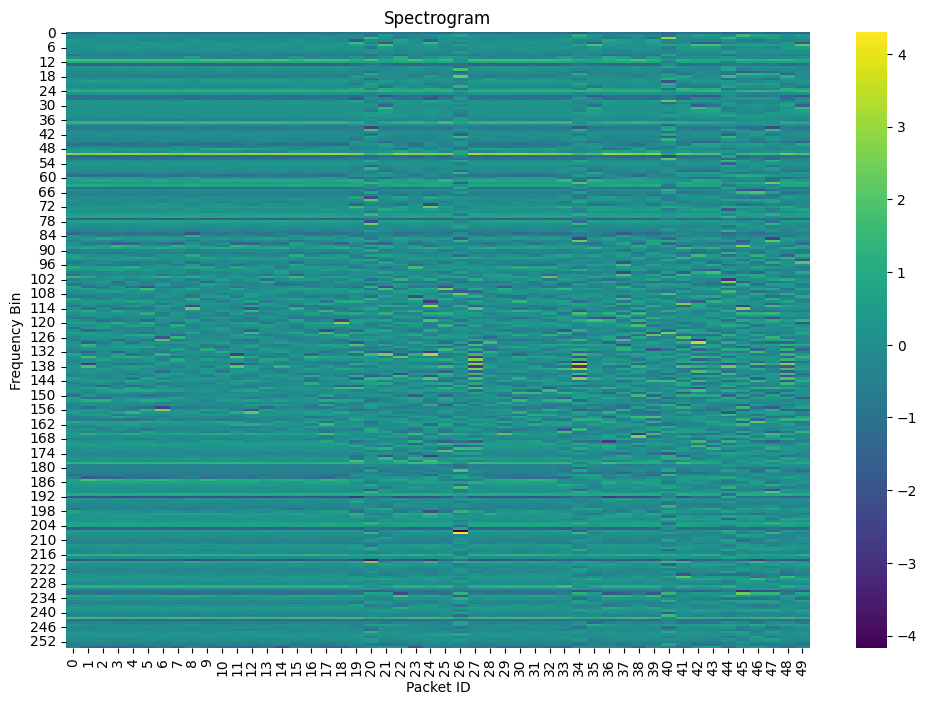

In [4]:
for tx_id in np.arange(1, 30):
    generate_spectrum(data, tx_id, 1, 1, 0)

In [7]:
slc = slice(0,256)
x = np.zeros((1000, 1))

x[slc].shape

(256, 1)

In [8]:
int(np.floor((62-256)/128 + 1) - 1)

-2